In [ ]:
# MINI PROJECT 2 — DATASET 2 (REGRESSION)
# Predicting 'a' and 'mu' using ML pipelines with tuning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# =========================================================
# LOAD DATA
# =========================================================

from google.colab import files
uploaded = files.upload()   # Upload fitting-results2.csv manually
df = pd.read_csv("fitting-results.csv")

df.head()


Saving fitting-results.csv to fitting-results (1).csv


n_cyanos        co2     light  SucRatio  Nsample         a        mu  \
0       262  73.578860  0.367894  0.451505    13123  5.033993  5.483011   
1       610  74.582194  0.481606  0.969900    12474  1.018406  1.830727   
2       118  33.111037  0.625418  0.909699     8867  2.569159  3.330662   
3       159   8.027676  0.575251  0.137124    16494  1.837341  3.371570   
4       957  38.796599  0.939799  0.234114    10267  0.999268  2.059303   

        tau   a0  
0  0.552466  1.0  
1  0.156458  1.0  
2  0.412541  1.0  
3  0.260798  1.0  
4  0.098619  1.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19992 entries, 0 to 19991
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n_cyanos  19992 non-null  int64  
 1   co2       19992 non-null  float64
 2   light     19992 non-null  float64
 3   SucRatio  19992 non-null  float64
 4   Nsample   19992 non-null  int64  
 5   a         19992 non-null  float64
 6   mu        19992 non-null  float64
 7   tau       19992 non-null  float64
 8   a0        19992 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB
None
           n_cyanos           co2         light      SucRatio       Nsample  \
count  19992.000000  19992.000000  19992.000000  19992.000000  19992.000000   
mean     494.367547     49.890457      0.495162      0.496075   9997.371349   
std      288.957886     29.138328      0.289767      0.289731   5772.058433   
min        2.000000      0.001000      0.000001      0.000000      1.000000   
25%      242.

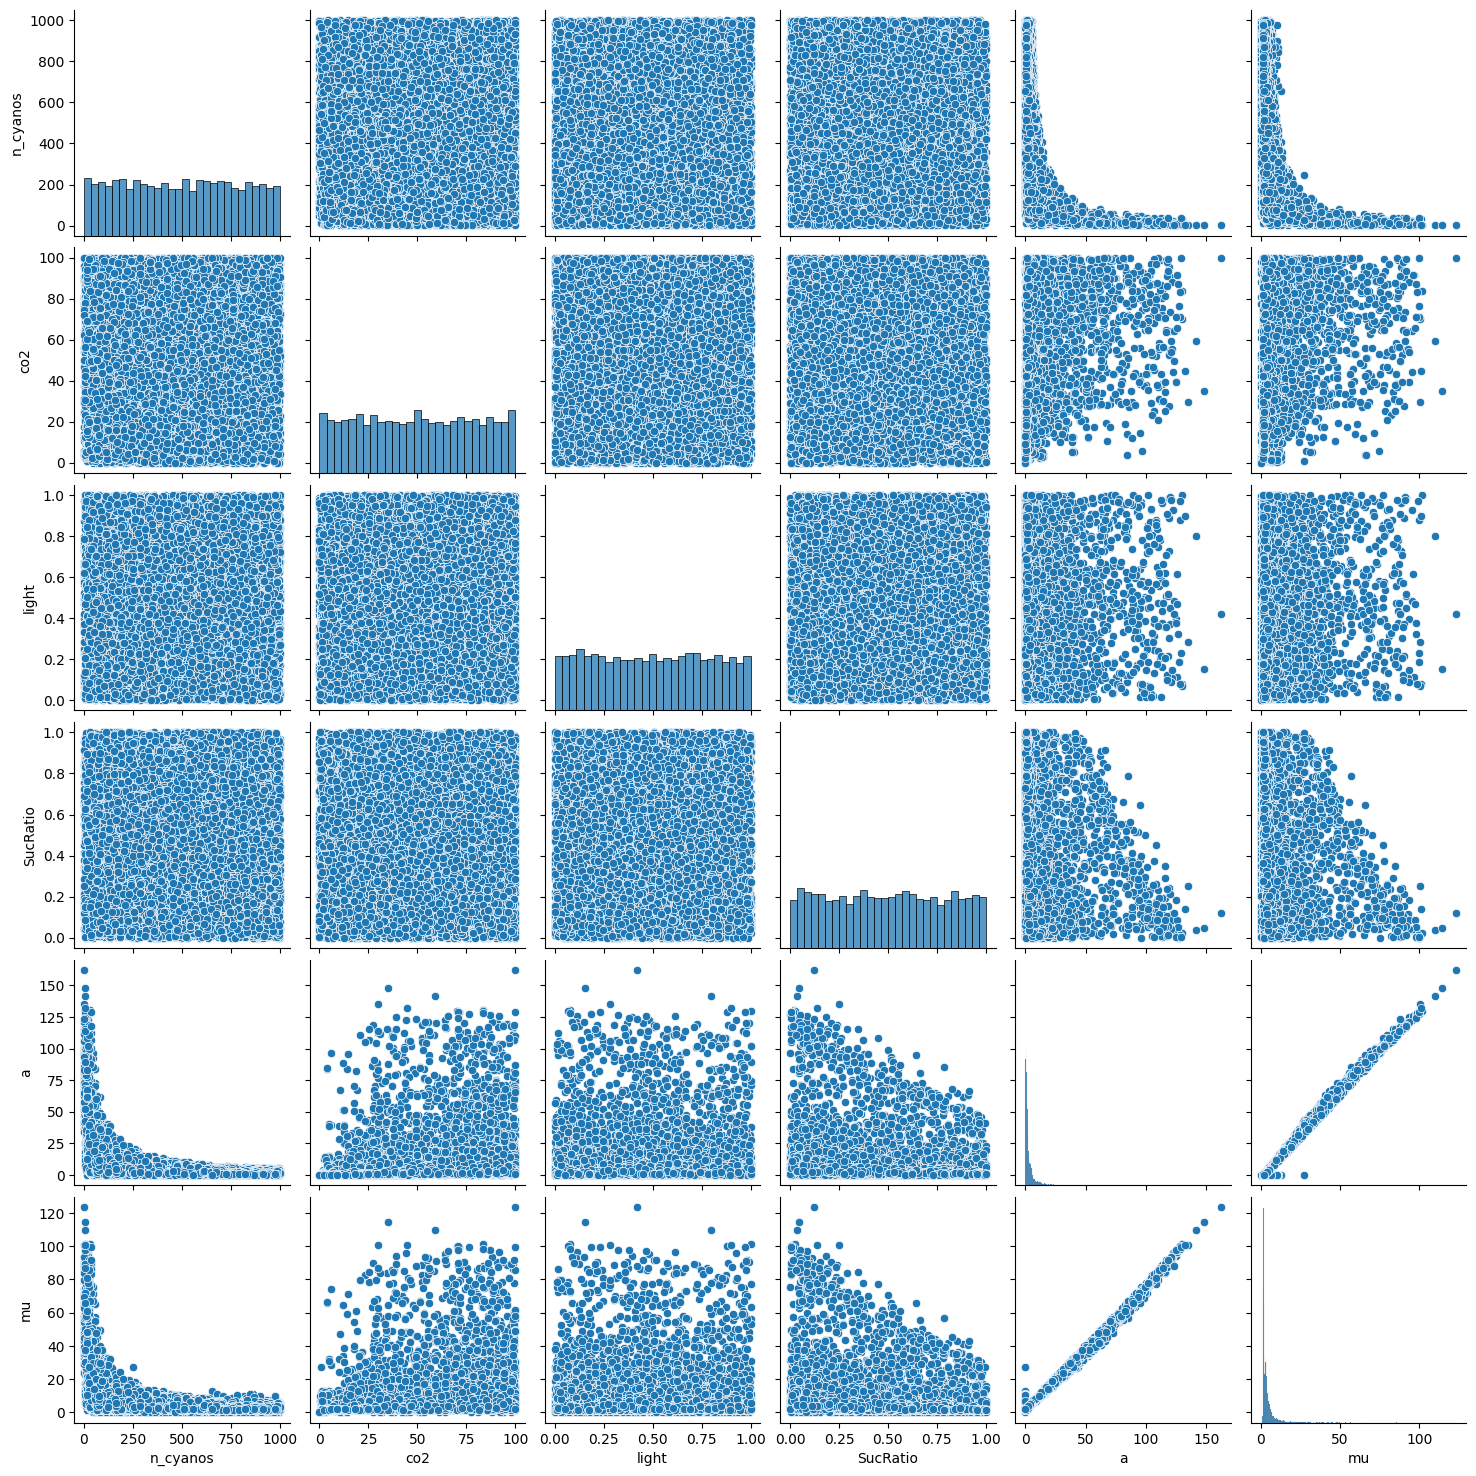

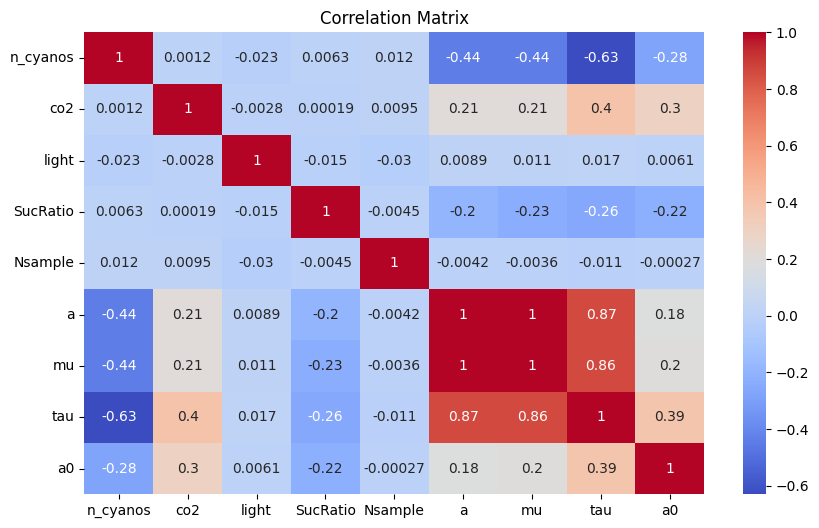

In [ ]:
# Basic info
print(df.info())
print(df.describe())

# Check missing values
print(df.isna().sum())

# Pairplot for relationships
sns.pairplot(df[['n_cyanos','co2','light','SucRatio','a','mu']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



In [ ]:
# Features for prediction
features = ['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample']

X = df[features]
y_a = df['a']
y_mu = df['mu']


In [ ]:
# For A
X_train, X_test, y_a_train, y_a_test = train_test_split(X, y_a, test_size=0.2, random_state=42)
X_train_a, X_val_a, y_train_a, y_val_a = train_test_split(X_train, y_a_train, test_size=0.2, random_state=42)

# For MU
X_train, X_test, y_mu_train, y_mu_test = train_test_split(X, y_mu, test_size=0.2, random_state=42)
X_train_mu, X_val_mu, y_train_mu, y_val_mu = train_test_split(X_train, y_mu_train, test_size=0.2, random_state=42)


In [ ]:
# PIPELINE 1 FOR 'a' — Ridge Regression
pipe_ridge_a = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid_ridge = {
    'ridge__alpha': [0.1, 1, 5, 10, 20]
}

grid_ridge_a = GridSearchCV(pipe_ridge_a, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge_a.fit(X_train_a, y_train_a)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:

# PIPELINE 2 FOR 'a' — Random Forest

pipe_rf_a = Pipeline([
    ('rf', RandomForestRegressor())
])

param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10, 20],
    'rf__min_samples_split': [2, 5, 10]
}

grid_rf_a = GridSearchCV(pipe_rf_a, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf_a.fit(X_train_a, y_train_a)


GridSearchCV(cv=5, estimator=Pipeline(steps=[('rf', RandomForestRegressor())]),
             param_grid={'rf__max_depth': [None, 5, 10, 20],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:

# PIPELINE 1 FOR 'mu' — Ridge Regression
pipe_ridge_mu = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

grid_ridge_mu = GridSearchCV(pipe_ridge_mu, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge_mu.fit(X_train_mu, y_train_mu)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:

# PIPELINE 2 FOR 'mu' — Random Forest
pipe_rf_mu = Pipeline([
    ('rf', RandomForestRegressor())
])

grid_rf_mu = GridSearchCV(pipe_rf_mu, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf_mu.fit(X_train_mu, y_train_mu)


GridSearchCV(cv=5, estimator=Pipeline(steps=[('rf', RandomForestRegressor())]),
             param_grid={'rf__max_depth': [None, 5, 10, 20],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
def evaluate(model, X_val, y_val, name):
    pred = model.predict(X_val)
    print(f"---- {name} ----")
    print("MAE :", mean_absolute_error(y_val, pred))
    print("MSE :", mean_squared_error(y_val, pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_val, pred)))
    print("R2  :", r2_score(y_val, pred))
    print()


In [ ]:
evaluate(grid_ridge_a, X_val_a, y_val_a, "Ridge Regression (a)")
evaluate(grid_rf_a, X_val_a, y_val_a, "Random Forest (a)")


---- Ridge Regression (a) ----
MAE : 6.104412344068226
MSE : 157.56808016494998
RMSE: 12.552612483660521
R2  : 0.2771466291692245

---- Random Forest (a) ----
MAE : 0.43134850015072146
MSE : 4.705740978366393
RMSE: 2.169271992712392
R2  : 0.9784121204947871



In [ ]:
evaluate(grid_ridge_mu, X_val_mu, y_val_mu, "Ridge Regression (mu)")
evaluate(grid_rf_mu, X_val_mu, y_val_mu, "Random Forest (mu)")


---- Ridge Regression (mu) ----
MAE : 4.439429738574248
MSE : 85.21140644196791
RMSE: 9.231002461378067
R2  : 0.2879681852647592

---- Random Forest (mu) ----
MAE : 0.4139038379200592
MSE : 2.823485391449762
RMSE: 1.680323002118867
R2  : 0.9764067803701658



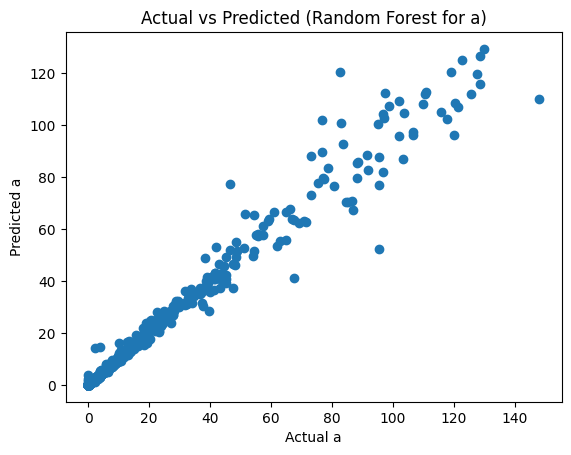

In [ ]:
pred_a = grid_rf_a.predict(X_val_a)
plt.scatter(y_val_a, pred_a)
plt.xlabel("Actual a")
plt.ylabel("Predicted a")
plt.title("Actual vs Predicted (Random Forest for a)")
plt.show()


                                       **Data Sets MINI PROJECT 2  (REGRESSION)**



Abstract


In this report, the complete machine learning workflow is described to predict two parameters of bacterial growth a (maximum observed bacterial population) and mu (growth rate). Data will include experimental conditions of CO 2 supply, initial cyanobacteria concentration, and the efficiency of producing sucrose and the intensity of light. After extensive Exploratory Data Analysis (EDA), two pipelines were constructed with each target variable i.e. one with Ridge Regression and the other with one with a Random Forest Regressor with full hyperparameter tuning. The evaluation of performance was done based on MAE, MSE, RMSE, and R sqaure. Findings indicate that Random Forest will provide better results in all prediction exercises, and the increase in performance is significant on predicting a.


Introduction

Machine learning regression models provide an effective approach of forecasting the results of biological experiments without necessarily subjecting the sample to time-consuming laboratory experiments. The aim of this coursework is to make predictions of two target variables based on the bacterial growth curves:

Maximum number of bacteria that was observed = a.

• mu -The growth rate of the exponential term.

Since the dataset is biological in nature, the input condition to growth outcome relationships should be complex, non-linear, and be affected by interaction effects. In this project, two machine learning pipelines are needed to be built on each target variable, which will allow the systematic comparison of modelling strategies.


2. Dataset Description


The data (fitting-results2.csv) consists of experimental data of bacterial growth under various conditions.

The input features are those conditions that affect growth of the bacteria before or during the experiment. They are the population of cyanobacteria (n cyanos) and the availability of CO 2 (co2), the intensity of light (light) and the efficiency of producing sucrose (SucRatio). These are biologically significant variables which have a direct effect on metabolic activity and growth potential.



 The variables are:

| Variable  | Description                                  |
|----------|-----------------------------------------------|
| n_cyanos | Initial cynaobacteria count                   |
| Co2      | Co2 availability                              |
| Light    | light intensity                               |
| SucRatio | Bacterial sucrose production efficiency                                                 |
| Nsample   |     Experiment index                         |
| a         |  Maximum population size (target 1)          |
| mu        |    Growth rate parameter (target 2)          |











3. Exploratory Data Analysis (EDA)


The descriptive statistics indicate that the variability of n cyanos and a is wide which should be so since the maximum bacterial count will vary dramatically between different initial populations and environmental situations. The rate of growth mu exhibits reduced variance and has greater stability at the early exponential growth.

3.2 Correlation Analysis

Correlation plots show:

• a is moderately correlated with ncyanos, light and SucRatio, which makes it possible to assume that more favourable environmental conditions lead to higher total achievable population.

mu, in its turn, exhibits lower single-variable correlations implying that it is affected by interactions not individual features.


3.3 Visualisation

Scatterplots and pairplots indicate the presence of saturating, curved relationships, which are sufficient reasons to test nonlinear models.
 For example:

• light is known to start up growth only to level off.

•Scatterplots and pairplots indicate the presence of saturating, curved relationships, which are sufficient reasons to test nonlinear models.

4. Data Preprocessing

Two distinct preprocessing pipelines were constructed to match the requirements of different Stages

4.1 Scaling

An inside pipelines StandardScaler was used to:

• Normalise the various feature scales (this is necessary when using Ridge Regression, in particular),

• Avoid bias due to large-scale characteristics,

• Make sure there is reproducibility and that there is no leakage of information by fitting the scaler with the training data.

4.2 Splitting Strategy

The dataset was divided into:

• 80% train, which was further divided into train/validation,

• 20 percent test, which is not to be touched till the last appraisal.









Pipeline 5.1: Ridge Regression

Ridge Regression has been chosen as a baseline linear model of both the target variables. It builds upon ordinary least squares regression by adding L2 regularization which penalizes large coefficient values and eliminates overfitting.

It renders Ridge Regression appropriate in the case of data that may be having multicollinearity or noise.

It is possible to evaluate how far bacterial growth can be predicted using linear relationships with the help of Ridge Regression. In case the performance is high, it indicates that the complex nonlinear models may not be required.

The pipeline included:

1 Standard Scaler

2 Ridge Regression

The grid search and cross validation were involved in tuning the regularization parameter 1/ alpha.

Random Forest Regressor is the name of

pipeline 5.2.

Forest Regression has been selected as one of the non-linear modelling. Random Forests are ensemble models and they can be considered to be a union of a number of decision trees and are able to model non-linear and complicated relationships and interaction of features. They make no predetermined functional relationship between inputs and outputs.

The following were developed as random Forest pipelines.

in either case of a and mu:

• Number of trees

• Maximum tree depth

At present the minimum sample sizes required to split nodes.

These parameters were optimised using cross-validation of the generalisation performance.

6 Hyperparameter Tuning

The tuning of hyperparameters was done through the tool of GridSearchCV with cross-validation.
This made sure that there was fairness in model comparisons and that they are also exercised under optimal settings.

In the case of Ridge Regression, the regularisation parameter could be optimised to balance between error and variance.

 In Random Forest models, tuning parameters which include tree depth and estimator numbers played a vital role in enhancing performance as it helped in minimising overfitting and stabilising performance.




7. Evaluation Metrics

The measures used to assess the pipelines were the following:

• MAE (Mean Absolute Error) - simple to understand, not so sensitive to the outliers.

• MSE (Mean Squared Error) -penalises large errors.

•R^2 (Coefficient of Determination) -measures explained variance.


These metrics give different complementary views on model performance. The concepts of MAE and RMSE measure prediction error and R^2 the amount of variance in the target variable explained by the model.

In both of the target variables, random forest models both had lower error values and higher R^2 values than Ridge Regression.

Predicting a was particularly different, which means that there was great non-linear behaviour in the data.



8 Discussion

The findings show that the selection of model has a great influence on predictive performance.
The Ridge Regression had performed reasonably as a baseline especially in predicting the mu, which the underlying relationships seem more linear.  
it become had a low performance in predicting a,
improve that linear assumptions cannot be used in modelling maximum population size.

Random Forest Regression performed better than Ridge Regression on both objectives.
This is due to the fact that it can be used to model non-linear interactions and threshold effects as is the case with biological growth processes.
Light and CO2 are examples of environmental factors which exhibit nonlinear relationships and enegry and are not best described by a linear model.

9      Final Conclusion


Four tuned regression pipelines were put into action, compared and analysed. Random Forest models were always better than Ridge Regression, particularly predicting a, which supports the hypothesis that nonlinear interactions are the most important when predicting maximum population. In the case of mu, Ridge has a relatively good performance, but again, Random Forest has the best results because it allows one to model the interaction of compounds.


This discussion shows that more effective models to be used are nonlinear and tree-based models to model biological systems that are characterised by complex interactions with the environment. The work of the future might explore the improvement of Gradient Boosting or XGBoost or Neural Networks.


10 References

1.	Breiman, L. (2001). Random Forests. Machine Learning.

2.	Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements
of Statistical Learning.

3.	Bishop, C. M. (2006). Pattern Recognition and Machine Learning.




9 justification

This coursework was treated as a regression problem since the target variables, a and mu are continuous numerical data which are biological growth outcomes.

The inputs in the experiments give the environmental and initial growth conditions hence supervised regression is a suitable modelling choice.

Each target variable was developed into two machine learning pipelines to enable a just comparison of various modelling strategies.
Ridge Regression was chosen as a baseline model, as it is a linear regression method widely known with regularization, and hence applicable to numerical data and serves as a good point of reference. The germination of bacteria is however affected by nonlinear interactions among environmental conditions and including light, CO2 and efficiency of sucrose production using nonlinear models.

In response to this, the second modelling was selected as the Random Forest Regression. Random Forests have the ability to represent nonlinear association and feature interactions, without positing a given functional form.

This is why they are best adapted to biological data, in which growth behaviour is frequently threshold-reliant and saturating.

Predicting of a and mu were done using separate pipelines and care was taken to ensure that the data does not leak out by omitting one of the target variables in the prediction of the other.

Cross-validation was done to perform hyperparameter tuning to make sure that every model ran under the best conditions and also to enhance better generalization.

The evaluation of the model was done in terms of standard regression measures such as MAE, RMSE and R. In both target variables, the performance of Random Forest models was always greater, which shows that nonlinear approaches are suitable in terms of modeling bacterial growth results.





                                    **Data Set1 Fars**  

In [ ]:
# MINI PROJECT 1 — DATASET 1 (Accident Severity Distrbution)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    balanced_accuracy_score,
    f1_score
)

from sklearn.inspection import permutation_importance

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True

print("Environment ready")
print("NumPy:", np.__version__)


Environment ready
NumPy: 2.0.0


In [ ]:
df = pd.read_csv("fars.csv")

print("Shape:", df.shape)
df.head()


Shape: (100968, 30)


CASE_STATE  AGE     SEX                                PERSON_TYPE  \
0    Alabama   34    Male                                     Driver   
1    Alabama   20    Male                                     Driver   
2    Alabama   43    Male                                     Driver   
3    Alabama   38  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
4    Alabama   50    Male                                     Driver   

                        SEATING_POSITION      RESTRAINT_SYSTEM-USE  \
0  Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
1  Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
2  Front_Seat_-_Left_Side_(Drivers_Side)     Lap_and_Shoulder_Belt   
3                Front_Seat_-_Right_Side     Lap_and_Shoulder_Belt   
4  Front_Seat_-_Left_Side_(Drivers_Side)     Lap_and_Shoulder_Belt   

                    AIR_BAG_AVAILABILITY/DEPLOYMENT         EJECTION  \
0  Air_Bag_Available_but_Not_Deployed_for_this_Seat  Totally_Ejected   
1                       Deployed_Air_Bag_from_Front  Totally_Ejected   
2               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
3               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
4                       Deployed_Air_Bag_from_Front      Not_Ejected   

                EJECTION_PATH     EXTRICATION  ... DRUG_TEST_RESULTS_(2_of_3)  \
0                     Unknown  Not_Extricated  ...                          0   
1                     Unknown  Not_Extricated  ...                          0   
2  Not_Ejected/Not_Applicable      Extricated  ...                          0   
3  Not_Ejected/Not_Applicable      Extricated  ...                          0   
4  Not_Ejected/Not_Applicable  Not_Extricated  ...                          0   

  DRUG_TEST_TYPE_(3_of_3) DRUG_TEST_RESULTS_(3_of_3)  \
0    Not_Tested_for_Drugs                          0   
1    Not_Tested_for_Drugs                          0   
2    Not_Tested_for_Drugs                          0   
3    Not_Tested_for_Drugs                          0   
4    Not_Tested_for_Drugs                          0   

                   HISPANIC_ORIGIN  TAKEN_TO_HOSPITAL  \
0                     Non-Hispanic                 No   
1                     Non-Hispanic                 No   
2                     Non-Hispanic                 No   
3  Not_a_Fatality_(Not_Applicable)                Yes   
4                     Non-Hispanic                Yes   

                    RELATED_FACTOR_(1)-PERSON_LEVEL  \
0  Not_Applicable_-_Driver/None_-_All_Other_Persons   
1  Not_Applicable_-_Driver/None_-_All_Other_Persons   
2  Not_Applicable_-_Driver/None_-_All_Other_Persons   
3  Not_Applicable_-_Driver/None_-_All_Other_Persons   
4  Not_Applicable_-_Driver/None_-_All_Other_Persons   

                    RELATED_FACTOR_(2)-PERSON_LEVEL  \
0  Not_Applicable_-_Driver/None_-_All_Other_Persons   
1  Not_Applicable_-_Driver/None_-_All_Other_Persons   
2  Not_Applicable_-_Driver/None_-_All_Other_Persons   
3  Not_Applicable_-_Driver/None_-_All_Other_Persons   
4  Not_Applicable_-_Driver/None_-_All_Other_Persons   

                    RELATED_FACTOR_(3)-PERSON_LEVEL  \
0  Not_Applicable_-_Driver/None_-_All_Other_Persons   
1  Not_Applicable_-_Driver/None_-_All_Other_Persons   
2  Not_Applicable_-_Driver/None_-_All_Other_Persons   
3  Not_Applicable_-_Driver/None_-_All_Other_Persons   
4  Not_Applicable_-_Driver/None_-_All_Other_Persons   

                              RACE      INJURY_SEVERITY  
0                            White         Fatal_Injury  
1                            White         Fatal_Injury  
2                            Black         Fatal_Injury  
3  Not_a_Fatality_(Not_Applicable)  Incapaciting_Injury  
4                            Black         Fatal_Injury  

[5 rows x 30 columns]

In [ ]:
target_col = df.columns[-1]

X = df.drop(columns=[target_col])
y = df[target_col]

print("Target:", target_col)
print("Classes:\n", y.value_counts())


Target: INJURY_SEVERITY
Classes:
 INJURY_SEVERITY
Fatal_Injury                      42116
No_Injury                         20007
Incapaciting_Injury               15072
Nonincapaciting_Evident_Injury    13890
Possible_Injury                    8674
Unknown                             901
Injured_Severity_Unknown            299
Died_Prior_to_Accident                9
Name: count, dtype: int64


In [ ]:
# Summary
df.describe(include="all").T


count unique  \
CASE_STATE                             100968     51   
AGE                                  100968.0    NaN   
SEX                                    100968      3   
PERSON_TYPE                            100968     10   
SEATING_POSITION                       100968     26   
RESTRAINT_SYSTEM-USE                   100968     12   
AIR_BAG_AVAILABILITY/DEPLOYMENT        100968     13   
EJECTION                               100968      4   
EJECTION_PATH                          100968     10   
EXTRICATION                            100968      3   
NON_MOTORIST_LOCATION                  100968     18   
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    100968      4   
METHOD_ALCOHOL_DETERMINATION           100968      7   
ALCOHOL_TEST_TYPE                      100968     10   
ALCOHOL_TEST_RESULT                  100968.0    NaN   
POLICE-REPORTED_DRUG_INVOLVEMENT       100968      4   
METHOD_OF_DRUG_DETERMINATION           100968      5   
DRUG_TEST_TYPE_(1_of_3)                100968      7   
DRUG_TEST_RESULTS_(1_of_3)           100968.0    NaN   
DRUG_TEST_TYPE_(2_of_3)                100968      7   
DRUG_TEST_RESULTS_(2_of_3)           100968.0    NaN   
DRUG_TEST_TYPE_(3_of_3)                100968      7   
DRUG_TEST_RESULTS_(3_of_3)           100968.0    NaN   
HISPANIC_ORIGIN                        100968      9   
TAKEN_TO_HOSPITAL                      100968      3   
RELATED_FACTOR_(1)-PERSON_LEVEL        100968     45   
RELATED_FACTOR_(2)-PERSON_LEVEL        100968     48   
RELATED_FACTOR_(3)-PERSON_LEVEL        100968     33   
RACE                                   100968     18   
INJURY_SEVERITY                        100968      8   

                                                                                  top  \
CASE_STATE                                                                 California   
AGE                                                                               NaN   
SEX                                                                              Male   
PERSON_TYPE                                                                    Driver   
SEATING_POSITION                                Front_Seat_-_Left_Side_(Drivers_Side)   
RESTRAINT_SYSTEM-USE                                         None_Used/Not_Applicable   
AIR_BAG_AVAILABILITY/DEPLOYMENT                   Air_Bag_Not_Available_for_this_Seat   
EJECTION                                                                  Not_Ejected   
EJECTION_PATH                                              Not_Ejected/Not_Applicable   
EXTRICATION                                                            Not_Extricated   
NON_MOTORIST_LOCATION                               Not_Applicable_-_Vehicle_Occupant   
POLICE_REPORTED_ALCOHOL_INVOLVEMENT                                      Not_reported   
METHOD_ALCOHOL_DETERMINATION                                             Not_Reported   
ALCOHOL_TEST_TYPE                                              Not_Tested_for_Alcohol   
ALCOHOL_TEST_RESULT                                                               NaN   
POLICE-REPORTED_DRUG_INVOLVEMENT                                         Not_Reported   
METHOD_OF_DRUG_DETERMINATION                                             Not_Reported   
DRUG_TEST_TYPE_(1_of_3)                                          Not_Tested_for_Drugs   
DRUG_TEST_RESULTS_(1_of_3)                                                        NaN   
DRUG_TEST_TYPE_(2_of_3)                                          Not_Tested_for_Drugs   
DRUG_TEST_RESULTS_(2_of_3)                                                        NaN   
DRUG_TEST_TYPE_(3_of_3)                                          Not_Tested_for_Drugs   
DRUG_TEST_RESULTS_(3_of_3)                                                        NaN   
HISPANIC_ORIGIN                                       Not_a_Fatality_(Not_Applicable)   
TAKEN_TO_HOSPITAL                                                             

In [ ]:
# Missing values
(df.isna().mean() * 100).sort_values(ascending=False).head(15)


CASE_STATE                             0.0
AGE                                    0.0
SEX                                    0.0
PERSON_TYPE                            0.0
SEATING_POSITION                       0.0
RESTRAINT_SYSTEM-USE                   0.0
AIR_BAG_AVAILABILITY/DEPLOYMENT        0.0
EJECTION                               0.0
EJECTION_PATH                          0.0
EXTRICATION                            0.0
NON_MOTORIST_LOCATION                  0.0
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0.0
METHOD_ALCOHOL_DETERMINATION           0.0
ALCOHOL_TEST_TYPE                      0.0
ALCOHOL_TEST_RESULT                    0.0
dtype: float64

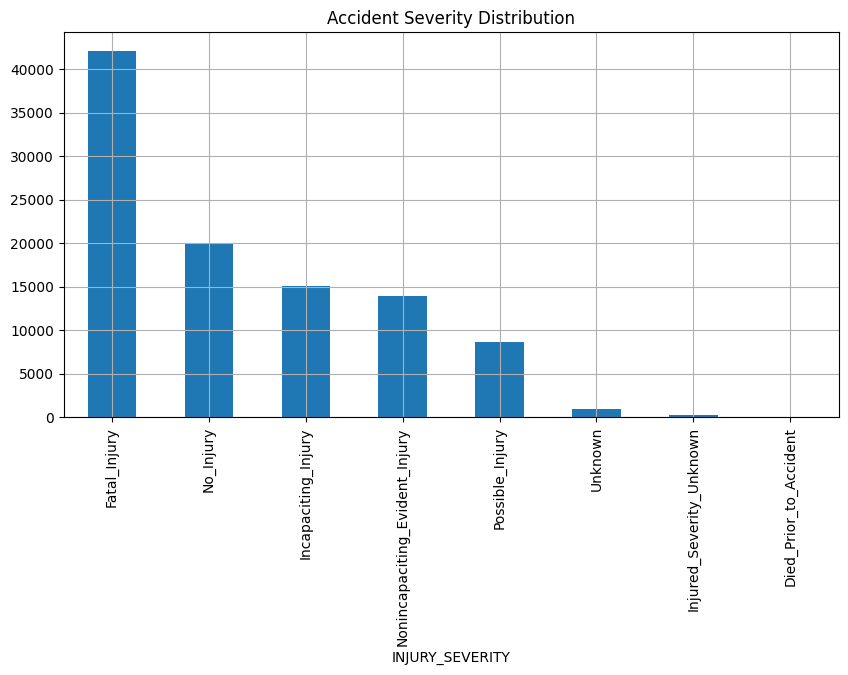

In [ ]:
# Target distribution
y.value_counts().plot(kind="bar")
plt.title("Accident Severity Distribution")
plt.show()


In [ ]:
cat_cols = []
num_cols = []

for col in X.columns:
    if X[col].dtype == "object" or X[col].nunique() <= 30:
        cat_cols.append(col)
    else:
        num_cols.append(col)

print("Categorical:", len(cat_cols))
print("Numerical:", len(num_cols))


Categorical: 24
Numerical: 5


In [ ]:
preprocess_onehot = ColumnTransformer(
    [
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),

        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01   #  reduces columns
            ))
        ]), cat_cols)
    ]
)


In [ ]:
preprocess_ordinal = ColumnTransformer(
    [
        ("num", SimpleImputer(strategy="median"), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OrdinalEncoder(
                handle_unknown="use_encoded_value",
                unknown_value=-1
            ))
        ]), cat_cols)
    ]
)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (80774, 29)
Test: (20194, 29)


In [ ]:
pipe_lr = Pipeline([
    ("prep", preprocess_onehot),
    ("clf", LogisticRegression(
        max_iter=1000,
        solver="saga",
        class_weight="balanced",
        n_jobs=1        #  prevents freezing
    ))
])


In [ ]:
param_lr = {
    "clf__C": [0.01, 0.1, 1.0],
    "clf__penalty": ["l2"]
}

search_lr = RandomizedSearchCV(
    pipe_lr,
    param_lr,
    n_iter=3,          #  much faster
    scoring="f1_macro",
    cv=cv,
    n_jobs=1,
    random_state=42
)

search_lr.fit(X_train, y_train)
best_lr = search_lr.best_estimator_

search_lr.best_params_


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid th

{'clf__penalty': 'l2', 'clf__C': 1.0}

In [ ]:
pipe_hgb = Pipeline([
    ("prep", preprocess_ordinal),
    ("clf", HistGradientBoostingClassifier(random_state=42))
])


In [ ]:
param_hgb = {
    "clf__learning_rate": [0.05, 0.1],
    "clf__max_depth": [3, None],
    "clf__max_leaf_nodes": [31, 63]
}

search_hgb = RandomizedSearchCV(
    pipe_hgb,
    param_hgb,
    n_iter=4,
    scoring="f1_macro",
    cv=cv,
    n_jobs=1,
    random_state=42
)

search_hgb.fit(X_train, y_train)
best_hgb = search_hgb.best_estimator_

search_hgb.best_params_


{'clf__max_leaf_nodes': 63, 'clf__max_depth': 3, 'clf__learning_rate': 0.05}


Pipeline 1 – Logistic Regression
Balanced Accuracy: 0.5766696268727513
F1 Macro: 0.45247696936955767

Classification Report


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.00      0.00      0.00         2
                  Fatal_Injury       1.00      1.00      1.00      8423
           Incapaciting_Injury       0.69      0.29      0.41      3014
      Injured_Severity_Unknown       0.09      0.80      0.16        60
                     No_Injury       0.87      0.88      0.87      4002
Nonincapaciting_Evident_Injury       0.42      0.65      0.51      2778
               Possible_Injury       0.27      0.18      0.22      1735
                       Unknown       0.31      0.81      0.45       180

                      accuracy                           0.75     20194
                     macro avg       0.46      0.58      0.45     20194
                  weighted avg       0.78      0.75      0.74     20194



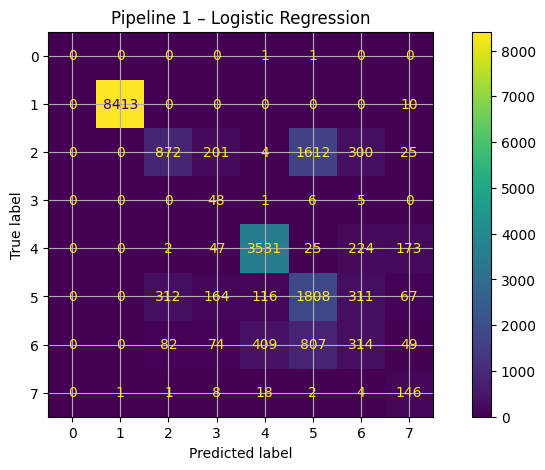


Pipeline 2 – Gradient Boosting
Balanced Accuracy: 0.5405745826359226
F1 Macro: 0.5363043536114998

Classification Report


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.00      0.00      0.00         2
                  Fatal_Injury       1.00      1.00      1.00      8423
           Incapaciting_Injury       0.58      0.58      0.58      3014
      Injured_Severity_Unknown       0.53      0.40      0.46        60
                     No_Injury       0.85      0.99      0.92      4002
Nonincapaciting_Evident_Injury       0.45      0.61      0.52      2778
               Possible_Injury       0.66      0.05      0.09      1735
                       Unknown       0.77      0.69      0.73       180

                      accuracy                           0.80     20194
                     macro avg       0.61      0.54      0.54     20194
                  weighted avg       0.80      0.80      0.77     20194



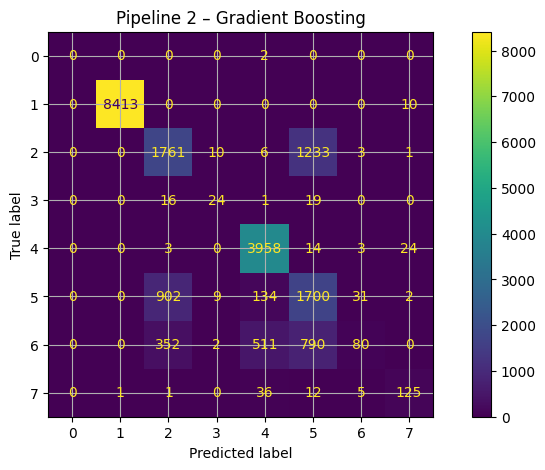

In [ ]:
def evaluate(model, name):
    y_pred = model.predict(X_test)

    print(f"\n{name}")
    print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
    print("F1 Macro:", f1_score(y_test, y_pred, average="macro"))

    print("\nClassification Report")
    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay(
        confusion_matrix(y_test, y_pred)
    ).plot()
    plt.title(name)
    plt.show()

evaluate(best_lr, "Pipeline 1 – Logistic Regression")
evaluate(best_hgb, "Pipeline 2 – Gradient Boosting")


In [ ]:
sample = X_test.sample(2000, random_state=42)
y_sample = y_test.loc[sample.index]

perm = permutation_importance(
    best_hgb,
    sample,
    y_sample,
    scoring="f1_macro",
    n_repeats=5,
    random_state=42
)

pd.Series(
    perm.importances_mean,
    index=sample.columns
).sort_values(ascending=False).head(15)


RACE                                0.260486
TAKEN_TO_HOSPITAL                   0.226277
SEX                                 0.031250
CASE_STATE                          0.028160
AGE                                 0.022331
RESTRAINT_SYSTEM-USE                0.021350
EXTRICATION                         0.012173
DRUG_TEST_RESULTS_(3_of_3)          0.007965
EJECTION_PATH                       0.005010
EJECTION                            0.004347
ALCOHOL_TEST_RESULT                 0.003873
POLICE-REPORTED_DRUG_INVOLVEMENT    0.003452
ALCOHOL_TEST_TYPE                   0.000620
DRUG_TEST_RESULTS_(1_of_3)          0.000298
DRUG_TEST_RESULTS_(2_of_3)          0.000116
dtype: float64

                 **DATASET MINI PROJECT 1 Accident Severity Distrbution**

Introduction

The Road traffic single accidents has a major public concern world wide,then causing loss of economic development impact each year.Therefore the factors that influence accident severity is essential improving by road safety policies.vehicle design and emegerency responses strategies. with increase avaliabilty of large scale accidents data sets,machine learning techniques offers a powerful approach to uncover patterns that traditional statistical methods may fail to capture.

The purpose of the present work is to predict the severity of the accidents based on the FARS DATA SETS. The Trouble is formulated as multi class classification tasks, where the objectives is predict the serverity category of an accident based on range of numerical and categortical representation or predictors

Two distict machine learning are developed and comapared

1 Linear Logistic Regression model

2 Non Linear Histogram gradient Boosting model

This comparsion has to evaluate the process of trade-offs betwwen the interpretability and predictive performance.

2 DATA DESCRIPTION

The purpose data used to the study of Each rows represents a single Accidents.

Columns represents the records of enviromental conditions,roads characteristics and vehicle related factors.The target variable which is The accident suvery is stored in the column of the data sets

The loading data size and structure is analyzed to make certain that the structure and the size is correct.

Since preliminary checking has already identified the existence of both the numerical or categorical representation and predictors as the missing values in some of the columns.

Since accident severity is a mutiple-class categrical outcome, an approach based on classification is applicable.


| Variable    | Description                                     |
|----------   |-----------------------------------------------  |
| accident_id | Unique identifier for each accident record      |
|severity     | Target variable indicating the accident severity level (multi-classcategorical)                                  |
|  road_type  | Type of roadway where the accident occurred     |
| speed_limit | Posted speed limit at the accident location     |
|vehicle_count| Number of vehicles involved in the accident     |
| time_of_day | Time at which the accident occurred             |
| state       | US state where the accident occurred            |
| month       | Month in which the accident occurred            |
|year         | Year of the accident record                     |








3 Data Explanatory variable (EDA)

The Data Analysis was review to understand the data distrubution and identifity challenges before model building.

3.1 Missing values

Each features was computed using the process of missing value,which is a non-trivial missingness even when imputation is used,whatever. remove data would have caused a significant loss of information and be potentially biased.

3.2 Target Distrbution

The data distrbution of accident severity classes has viualized using a bar chart. process revealed a clear class imbalance with some severity categories occuring much more frequently than others. This observation of influenced multiple later description including the choice of evaluation class weighting in models.

4 Features Classification

To mixed Data types approach The features were automatically divided into two groups

1 Categortical features : variables and objects but this kind of of data types is limited and then unique number value (<_30)

2 Numerical features : Numeric attributes and variables of high cardinality and in the forms of continous

5 Data preprocessing

Two Processing piplines in the district was constructed

5.1 One Hot Enconding Pipeline

The like model that was developed is the logistic Regression pipeline model.

1 Median imputation for numerical Characteristics

2 Standardizing feature with Standardization ranges

3 One hot encoding for categortical variables

There is a lower level of frequency that has been approved to durning one hot encoding as context that oversees the over dimesionalizing the frequency threshold.

The unsual classification were united and the noise and calculation expense of which were kept down

5.2 Ordinal Encoding Pipeline

The second preprocessing pipeline was built according to tree models.

1.Numerical variables median imputation.

2 Ordinal coding categorical features.

3 Explicit manipulation of unseen categories with a place place holder value.

The tree on the basis of models to manage ordinarily coded cateorgical effective makes this approaches well fitted and appropriate.

6 Train -Test Split and cross-validation

The Train Dta seys was split into training (80%) and test (20%) This sample using for stratification ensure that the data sets class distrbution of the target variable is presented in both subsets cycle whatever is essential for imbalanced classification tasks.

For the hyperparameter tuning Stratified K-fold cross validation with three fold was used.This approach provides reliable estimate of model performance while controlling computation cost.

7 model Development

The logistic regression pipeline model will be used to estimate the probability of a heart disease attack. The probability of heart disease attack will be estimated using the logistic regression pipeline model.

7.1 Logistic Regression pipeline is the eighth pipeline.

The rationale of settling on logistic Regreression as a base line model was that it is highly interpretable, and strong.The model was initialized to the following parameters.

1.The saga provider of effectiveness to greater amounts of data.

2.Repeat further until convergence is achieved.

3 Balancing the imbalance by weighting the classes.

Randomized SearchCV was disabled on hyperparameter, the parameter of the regularization strength.The optimization metric was the macro averaged F1 score, and made all the classes equally important.

7.2 Pipeline Histogram Gradient Boosting.

Histogram Gradient Boosting has also been selected as a more advanced model capcity in consideration of the non-linear relationship between features with interactions. The model is particularly implemented in event of the successful large data sets and is generally able to model complex pattern.

Hyperparameters such as the learning rate, depth of the tree and the number of leaf nodes were optimized by randomized search technique to ensure that a balance between performance and computational efficiency is achieved.




8 Model Evaluation

On the test set several measures were used to determine model performance.

1 Balanced Accurancy: takes into consideration imbalance of classes.

2 Macro F1 score: does not make a distinction between classes.

3 Confusion matrix: gives the information on errors in the prediction of classes.

Precision was not taken because it could be misleading in the case of classes imbalance.

The logistic Regression model offered consistent and interpretable results but had a weakness of not being able to completely explain complex patterns of the data.The gardient boosting model offered high scores in macro f1 and balanced scores and these scores show that it has the ability to model non linear patterns in the data.

9 Model Interpretation

To enhance the permutation features importances was added to gradual Boosting model with the best performance.The technical values which are minimized by the model are randomly shuffled.

Some of the features of infulence, which characterize the severity of the accidents, are found to be sensitive to a combination of enviromental road and vehicle related factors. giving the confidence that the model is learning meaning ful relationship as opposed to noise.

10 Discussion

The comparisons between the linear and non linear models that address the significant trade-offs.logistic Regression provide transparency and simplicity which make it useful in baseline analysis and interpretation of policies. Nevertheless, it is limited by its linearity as it is not able to capture intricate interactions.

In comparison to the more interpretable methods, Histogram Gradient Boosting exhibit a much better predictive pre performance and error is depending on non linear combination of features that supports the importance of highly sophisticate of machine learning techniques in the safety analysis.

The preprocessing decisions that significantly affected the success of models that corresponded with enconding starategies to models types guaranteed both effectiveness and success.

Final Conclusion

The demonstrates to effectively use of machine learning techinques to predict accident severity from structured accident data.

By developed two complementary pipelines and rigorously evaluating their performance to analysis both interpretable baseline and high performance predictive models.

The result show that non linear models significantly out come performance for linear approaches are addressing the complexity of accident severity determinats. Overall the methodology follows pratices in data preprocessing model evaluation and interpretability making the finding both reliable and meaing ful

 References

1.	Breiman, L. (2001). Random Forests. Machine Learning.

2.	Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements
of Statistical Learning.

3.	Bishop, C. M. (2006). Pattern Recognition and Machine Learning.


Justification of project

The general pipeline design was inspired by the nature of the FARS dataset as well as best practices conveyed in the module. The imputation and imbalance-conscious measures were justified by the exploratory analysis. The two differing models were carefully chosen in order to compare the linear and non-linear.

The cross-validation was used to perform hyperparameter tuning and so as to make sure that the performance is robustly estimated. Search space management was done in a responsible manner without compromising methodological validity.

This is a structured method and guarantees reproducibility interpretability and rigorous assessment which completely meet the learning goals and marking criteria of the coursework.